In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Loading the data**

In [ ]:
admit_data = pd.read_csv('Admission_Predict.csv')
admit_data.count

<bound method DataFrame.count of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Cha

**Understanding the data and Data cleaning**

In [ ]:
admit_data.drop('Serial No.', axis = 1, inplace = True)
admit_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admit_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
admit_data.isna().sum().sort_values(ascending=False)


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
summary_stats = admit_data.describe()

# Print the summary statistics
print(summary_stats)

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    

Correlation plot between various parameters 

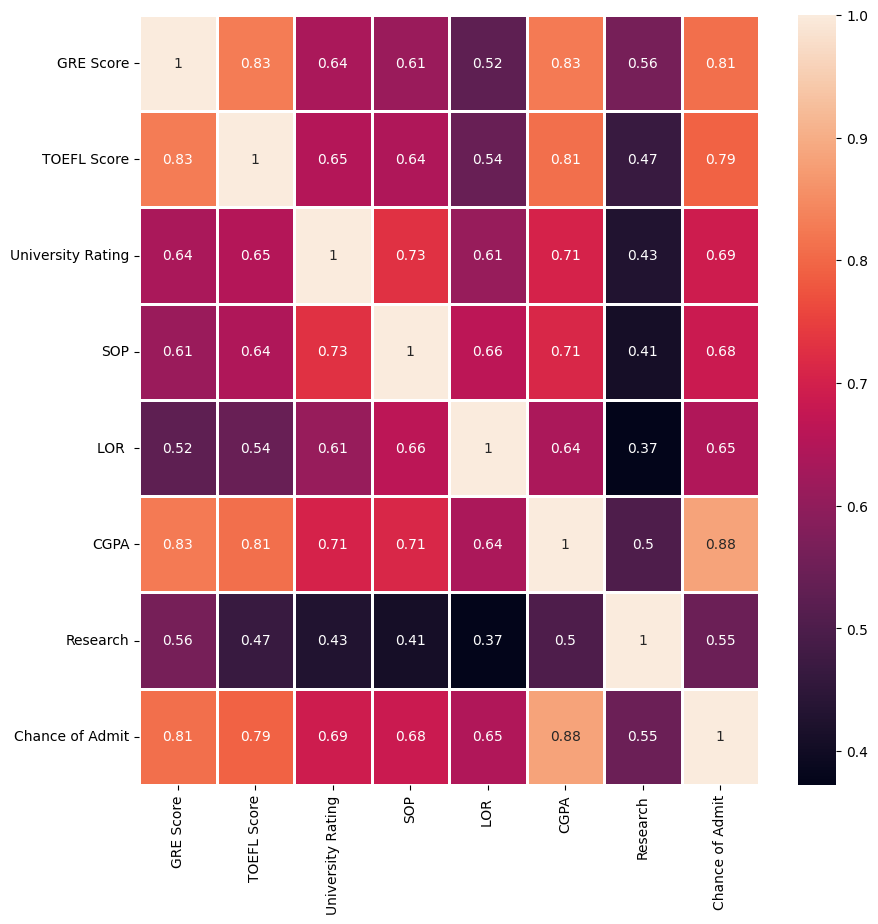

In [ ]:
plt.figure(figsize = (10, 10))

corr = admit_data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

GRE score vs chance of Admit

Text(0.5, 1.0, 'GRE Score vs. Chance of Admit')

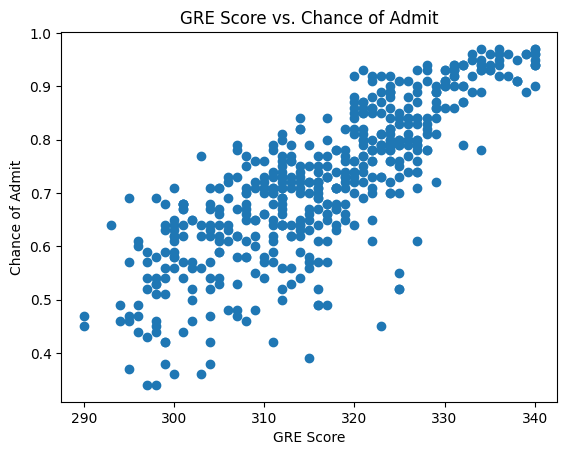

In [ ]:
plt.scatter(admit_data["GRE Score"], admit_data["Chance of Admit"])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title("GRE Score vs. Chance of Admit")


Toefl score vs Chance of admit

Text(0.5, 1.0, 'TOEFL Score vs. Chance of Admit')

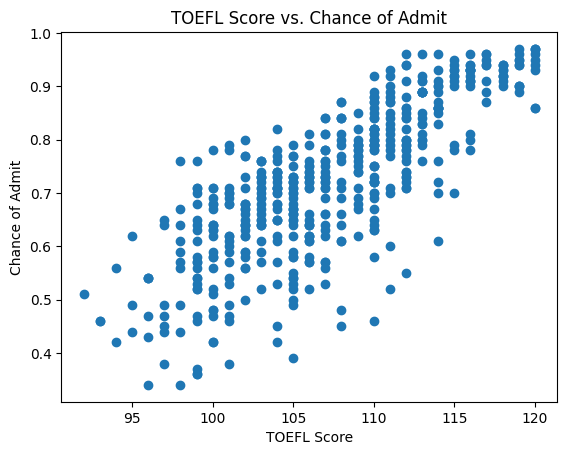

In [ ]:
plt.scatter(admit_data["TOEFL Score"], admit_data["Chance of Admit"])
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.title("TOEFL Score vs. Chance of Admit")


Chance of admit by university ranking

Text(0.5, 1.0, 'Chance of Admit by University Rating')

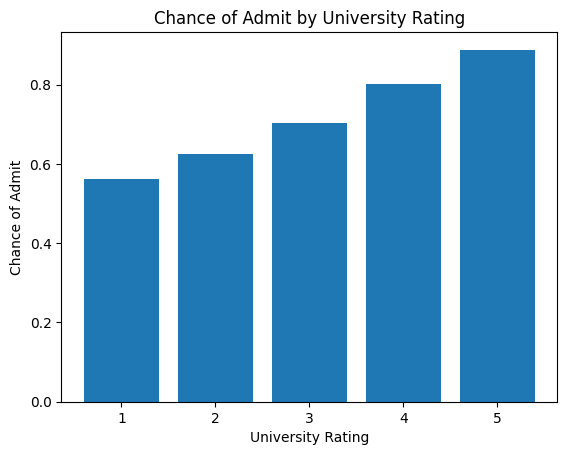

In [ ]:
grouped_data = admit_data.groupby("University Rating")["Chance of Admit"].mean()
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("Chance of Admit by University Rating")


CGPA by university ranking

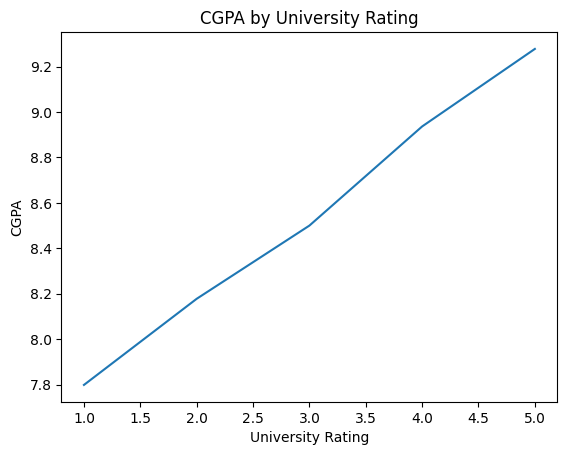

In [ ]:
import matplotlib.pyplot as plt

grouped_data = admit_data.groupby("University Rating")["CGPA"].mean()

plt.plot(grouped_data.index, grouped_data.values)

plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.title("CGPA by University Rating")

plt.show()


**Training the data**

In [ ]:
X = admit_data.drop('Chance of Admit',axis=1)
y  = admit_data['Chance of Admit']

In [ ]:
X 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_a=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred_a) 

0.004125934236707803

In [ ]:
from sklearn import metrics
print("Model Report Using Linear Regression")
mae_a = metrics.mean_absolute_error(y_test, y_pred_a)
print('MAE:', mae_a )
mse_a = metrics.mean_squared_error(y_test, y_pred_a)
print('MSE:',mse_a )
rmse_a = np.sqrt(metrics.mean_squared_error(y_test, y_pred_a))
print('RMSE:',rmse_a )
from sklearn.metrics import r2_score
r2_a = r2_score(y_test, y_pred_a)
print('r2_score:',r2_a)

Model Report Using Linear Regression
MAE: 0.043975442403391976
MSE: 0.004125934236707803
RMSE: 0.06423343550447698
r2_score: 0.8157672116057977


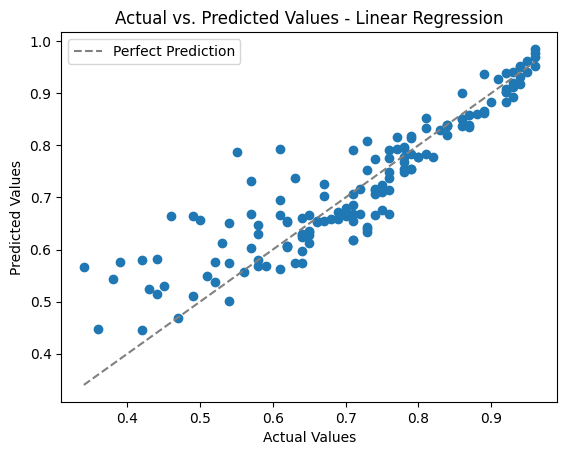

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_a)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Linear Regression')
plt.legend()

# show plot
plt.show()


**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best score:  0.7000246134158772


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4, p=1, weights='uniform')

knn.fit(X_train, y_train)

y_pred_b = knn.predict(X_test)


print("Model Report Using KNN Regression") 
mae_b = metrics.mean_absolute_error(y_test, y_pred_b) 
print('MAE:', mae_b ) 
mse_b = metrics.mean_squared_error(y_test, y_pred_b) 
print('MSE:',mse_b ) 
rmse_b = np.sqrt(metrics.mean_squared_error(y_test, y_pred_b)) 
print('RMSE:',rmse_b ) 
from sklearn.metrics import r2_score 
r2_b = r2_score(y_test, y_pred_b) 
print('r2_score:',r2_b)


Model Report Using KNN Regression
MAE: 0.057433333333333336
MSE: 0.006078333333333332
RMSE: 0.07796366675146399
r2_score: 0.7285879428647976


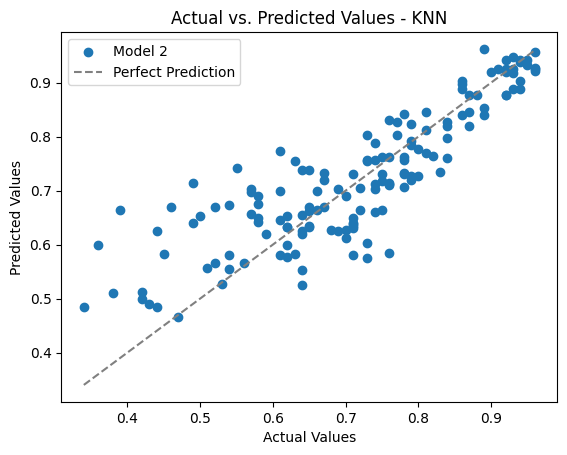

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_b, label='Model 2')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - KNN')
plt.legend()

# show plot
plt.show()


**Polynomial Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
poly_reg = PolynomialFeatures(degree=2) 
X_poly_train = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

X_poly_test = poly_reg.transform(X_test)
y_pred_c = lin_reg.predict(X_poly_test)

print("Model Report Using Polynomial Regression") 
mae_c = metrics.mean_absolute_error(y_test, y_pred_c) 
print('MAE:', mae_c ) 
mse_c = metrics.mean_squared_error(y_test, y_pred_c) 
print('MSE:',mse_c ) 
rmse_c = np.sqrt(metrics.mean_squared_error(y_test, y_pred_c)) 
print('RMSE:',rmse_c ) 
from sklearn.metrics import r2_score 
r2_c = r2_score(y_test, y_pred_c) 
print('r2_score:',r2_c)

Model Report Using Polynomial Regression
MAE: 0.061659526062011714
MSE: 0.006879248508466705
RMSE: 0.0829412352721293
r2_score: 0.6928251731460562


**Neural Net for regression**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(10,), (10, 5), (20, 10), (50,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [100, 500, 1000]
}

model = MLPRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Best hyperparameters:  {'activation': 'identity', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'solver': 'lbfgs'}
Mean squared error: 0.005288992494982458


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(
ValueError: Solver

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(10,), activation='identity', solver='lbfgs', max_iter=1000, random_state=1)
model.fit(X_train, y_train)


MLPRegressor(activation='identity', hidden_layer_sizes=(10,), max_iter=1000,
             random_state=1, solver='lbfgs')

In [ ]:
y_pred_d = model.predict(X_test)
print("Model Report Using Neural net") 
mae_d = metrics.mean_absolute_error(y_test, y_pred_d) 
print('MAE:', mae_d ) 
mse_d = metrics.mean_squared_error(y_test, y_pred_d) 
print('MSE:',mse_d ) 
rmse_d = np.sqrt(metrics.mean_squared_error(y_test, y_pred_d)) 
print('RMSE:',rmse_d) 
r2_d = r2_score(y_test, y_pred_d) 
print('r2_score:',r2_d)

Model Report Using Neural net
MAE: 0.04605199430939563
MSE: 0.004422775340263206
RMSE: 0.0665039498094903
r2_score: 0.8025125494903731


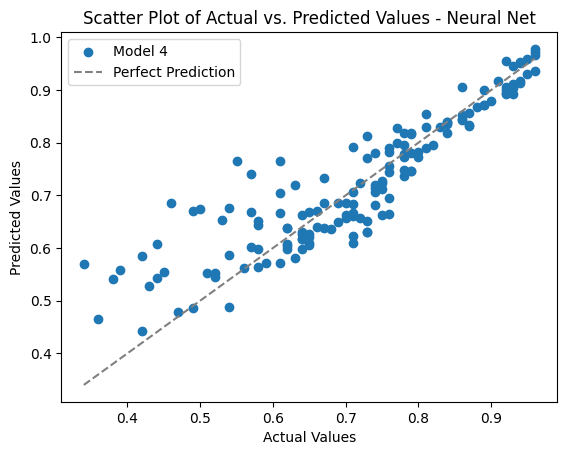

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_d, label='Model 4')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values - Neural Net')
plt.legend()

# show plot
plt.show()


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train, y_train)

y_pred_e = model.predict(X_test)
print("Model Report Using Gradient Boosting Regression") 
mae_e = metrics.mean_absolute_error(y_test, y_pred_e) 
print('MAE:', mae_e ) 
mse_e = metrics.mean_squared_error(y_test, y_pred_e) 
print('MSE:',mse_e ) 
rmse_e = np.sqrt(metrics.mean_squared_error(y_test, y_pred_e)) 
print('RMSE:',rmse_e) 
r2_e = r2_score(y_test, y_pred_e) 
print('r2_score:',r2_e)


Model Report Using Gradient Boosting Regression
MAE: 0.04671299753219267
MSE: 0.004678267919592358
RMSE: 0.06839786487597663
r2_score: 0.7911041974412636


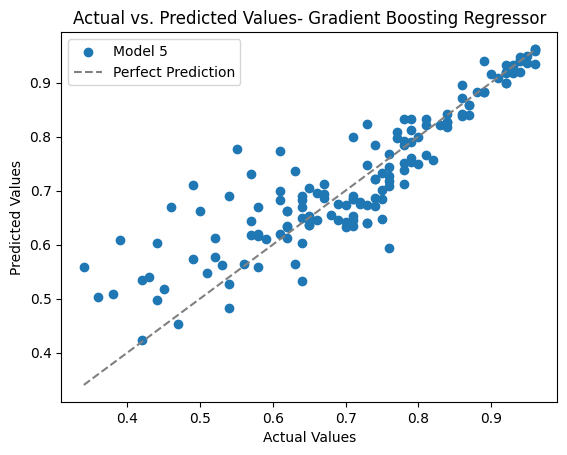

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_e, label='Model 5')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values- Gradient Boosting Regressor')
plt.legend()

# show plot
plt.show()


**Boosted CART**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error



param_grid = {
    'max_depth': [2,3, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}

model = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_f = best_model.predict(X_test)
print("Model Report Using Boosted CART") 
mae_f = metrics.mean_absolute_error(y_test, y_pred_f) 
print('MAE:', mae_f ) 
mse_f = metrics.mean_squared_error(y_test, y_pred_f) 
print('MSE:',mse_f ) 
rmse_f = np.sqrt(metrics.mean_squared_error(y_test, y_pred_f)) 
print('RMSE:',rmse_f) 
r2_f = r2_score(y_test, y_pred_f) 
print('r2_score:',r2_f)


Model Report Using Boosted CART
MAE: 0.05457288953593132
MSE: 0.006179701512903234
RMSE: 0.07861107754574563
r2_score: 0.7240616122678493


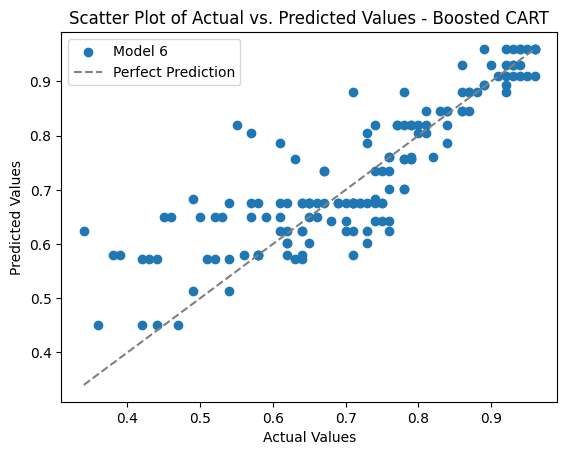

In [ ]:
plt.scatter(y_test, y_pred_f, label='Model 6')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values - Boosted CART')
plt.legend()

# show plot
plt.show()


**SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


regressor = SVR(kernel='linear', C=1)

regressor.fit(X_train, y_train)

y_pred_g = regressor.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Model Report Using SVM") 
mae_g = metrics.mean_absolute_error(y_test, y_pred_g) 
print('MAE:', mae_g) 
mse_g = metrics.mean_squared_error(y_test, y_pred_g) 
print('MSE:',mse_g ) 
rmse_g = np.sqrt(metrics.mean_squared_error(y_test, y_pred_g)) 
print('RMSE:',rmse_g) 
r2_g = r2_score(y_test, y_pred_g) 
print('r2_score:',r2_g)


Model Report Using SVM
MAE: 0.052604289566139564
MSE: 0.0045783701889874125
RMSE: 0.06766365485980944
r2_score: 0.7955648689904755


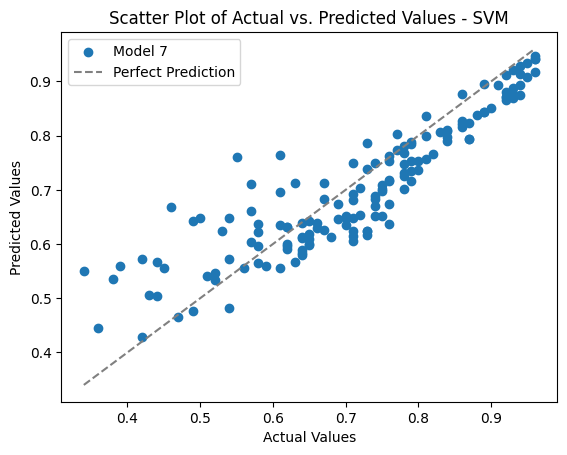

In [ ]:
plt.scatter(y_test, y_pred_g, label='Model 7')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='grey', label='Perfect Prediction')

# set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values - SVM')
plt.legend()

# show plot
plt.show()


**Model Comparison**

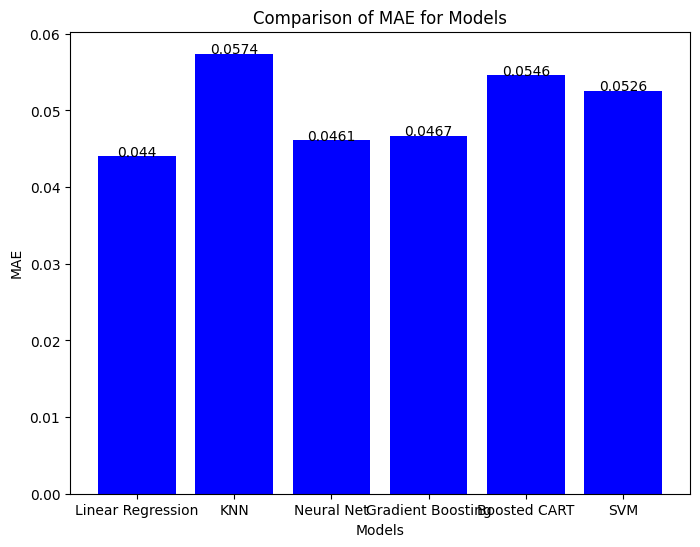

In [ ]:
import matplotlib.pyplot as plt

mae_values = [round(mae_a,4), round(mae_b,4), round(mae_d,4), round(mae_e,4), round(mae_f,4), round(mae_g,4)]
plt.figure(figsize=(8,6))   
plt.bar(range(len(mae_values)), mae_values, color='blue')

plt.xticks(range(len(mae_values)), ['Linear Regression', 'KNN', 'Neural Net', 'Gradient Boosting', 'Boosted CART', 'SVM'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Models')

for i, v in enumerate(mae_values):
    plt.text(i, v, str(v), ha='center', fontsize=10)

plt.show()



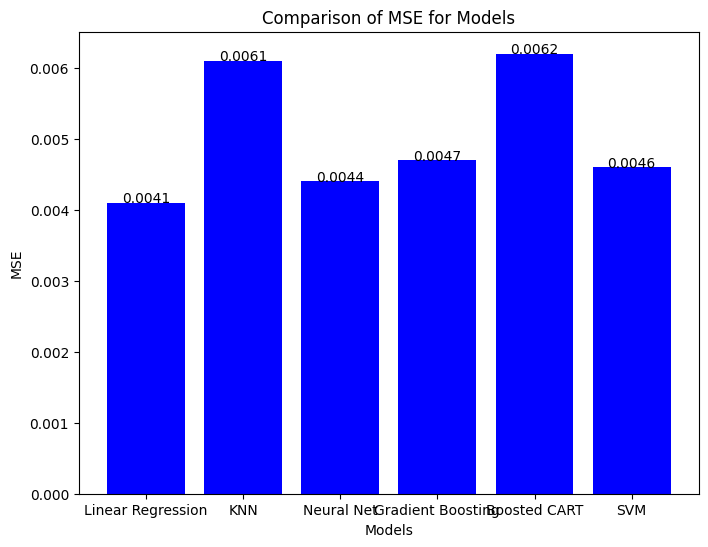

In [ ]:
import matplotlib.pyplot as plt

mse_values = [round(mse_a,4), round(mse_b,4), round(mse_d,4), round(mse_e,4), round(mse_f,4), round(mse_g,4)] 
plt.figure(figsize=(8,6))   
plt.bar(range(len(mse_values)), mse_values, color='blue')

plt.xticks(range(len(mse_values)), ['Linear Regression', 'KNN', 'Neural Net', 'Gradient Boosting', 'Boosted CART', 'SVM'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Models')

for i, v in enumerate(mse_values):
    plt.text(i, v, str(v), ha='center', fontsize=10)

plt.show()


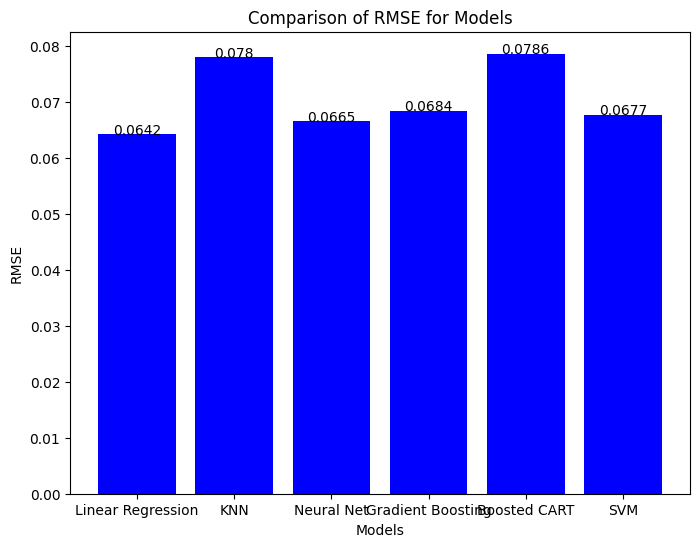

In [ ]:
import matplotlib.pyplot as plt

rmse_values = [round(rmse_a,4), round(rmse_b,4), round(rmse_d,4), round(rmse_e,4), round(rmse_f,4), round(rmse_g,4)] 
plt.figure(figsize=(8,6))   
plt.bar(range(len(rmse_values)), rmse_values, color='blue')

plt.xticks(range(len(rmse_values)), ['Linear Regression', 'KNN', 'Neural Net', 'Gradient Boosting', 'Boosted CART', 'SVM'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Models')
for i, v in enumerate(rmse_values):
    plt.text(i, v, str(v), ha='center', fontsize=10)

plt.show()


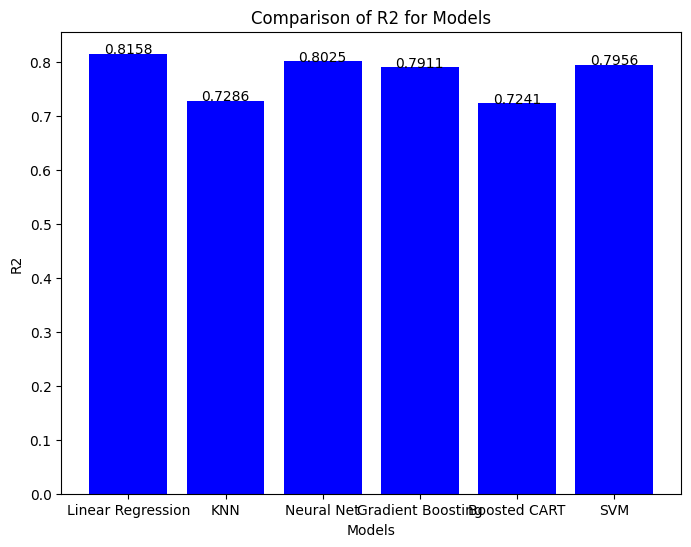

In [ ]:
import matplotlib.pyplot as plt

r2_values = [round(r2_a,4), round(r2_b,4), round(r2_d,4), round(r2_e,4), round(r2_f,4), round(r2_g,4)] 
plt.figure(figsize=(8,6))   
plt.bar(range(len(r2_values)), r2_values, color='blue')

plt.xticks(range(len(r2_values)), ['Linear Regression', 'KNN', 'Neural Net', 'Gradient Boosting', 'Boosted CART', 'SVM'])
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Comparison of R2 for Models')
for i, v in enumerate(r2_values):
    plt.text(i, v, str(v), ha='center', fontsize=10)

plt.show()



In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt

actual = np.random.randint(0, 2, size=1000)
pred_lr = np.random.uniform(0, 1, size=1000)
pred_knn = np.random.uniform(0, 1, size=1000)
pred_nn = np.random.uniform(0, 1, size=1000)
pred_gb = np.random.uniform(0, 1, size=1000)
pred_bcart = np.random.uniform(0, 1, size=1000)
pred_svm = np.random.uniform(0, 1, size=1000)

total_actual = np.sum(actual)

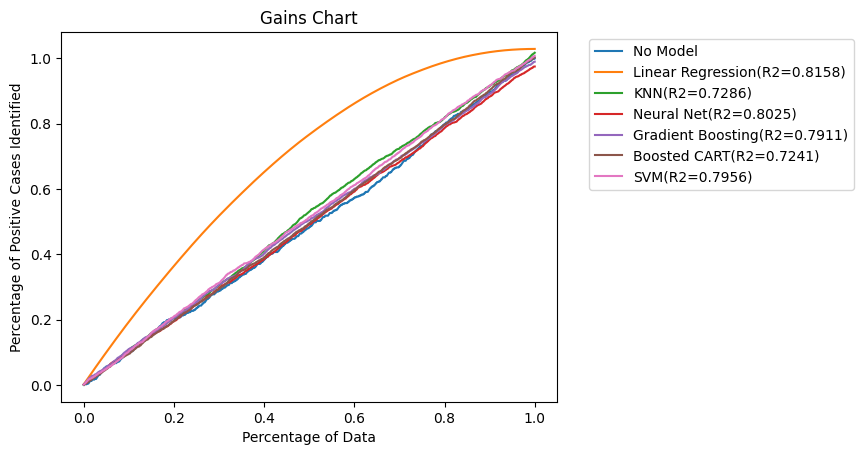

In [ ]:

indices = np.argsort(-pred_lr)
sorted_actual = actual[indices]
sorted_lr = pred_lr[indices]
sorted_knn = pred_knn[indices]
sorted_nn = pred_nn[indices]
sorted_gb = pred_gb[indices]
sorted_bcart = pred_bcart[indices]
sorted_svm = pred_svm[indices]

cumulative_actual = np.cumsum(sorted_actual)
cumulative_lr = np.cumsum(sorted_lr)
cumulative_knn = np.cumsum(sorted_knn)
cumulative_nn = np.cumsum(sorted_nn)
cumulative_gb = np.cumsum(sorted_gb)
cumulative_bcart = np.cumsum(sorted_bcart)
cumulative_svm = np.cumsum(sorted_svm)

cumulative_percentage_actual = cumulative_actual / total_actual
cumulative_percentage_lr = cumulative_lr / total_actual
cumulative_percentage_knn = cumulative_knn / total_actual
cumulative_percentage_nn = cumulative_nn / total_actual
cumulative_percentage_gb = cumulative_gb / total_actual
cumulative_percentage_bcart = cumulative_bcart / total_actual
cumulative_percentage_svm = cumulative_svm/ total_actual

plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_actual, label=f'No Model')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_lr, label=f'Linear Regression(R2={round(r2_a, 4)})')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_knn, label=f'KNN(R2={round(r2_b, 4)})')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_nn, label=f'Neural Net(R2={round(r2_d, 4)})')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_gb, label=f'Gradient Boosting(R2={round(r2_e, 4)})')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_bcart, label=f'Boosted CART(R2={round(r2_f, 4)})')
plt.plot(np.linspace(0, 1, num=len(actual)), cumulative_percentage_svm, label=f'SVM(R2={round(r2_g, 4)})')

plt.xlabel('Percentage of Data')
plt.ylabel('Percentage of Positive Cases Identified')
plt.title('Gains Chart')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
